#### Import Libraries

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import plotly.express as px
import warnings
warnings.simplefilter('ignore')

#### Loading the data

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

#### Understanding the data

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [4]:
df.rename(columns = {'Exited':'Churn'}, inplace= True)

In [5]:
df.shape

(10002, 14)

In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Churn'],
      dtype='object')

In [7]:
df.drop(["RowNumber"], axis=1, inplace= True)

In [8]:
df.drop(["CustomerId"], axis=1, inplace= True)

In [9]:
df.drop(["Surname"], axis=1, inplace= True)

#### Data Cleaning

##### Checking for Missing Values

In [10]:
df.isnull().sum()

CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Churn              0
dtype: int64

##### Filling Null Values

In [11]:
geography_mode = df['Geography'].mode()[0]
print(geography_mode)
df["Geography"] = df["Geography"].fillna(geography_mode)

France


In [12]:
age_mean= df['Age'].mean()
df["Age"] = df["Age"].fillna(age_mean)

In [13]:
crcard_mode = df['HasCrCard'].mode()[0]
df["HasCrCard"] = df["HasCrCard"].fillna(crcard_mode)

In [14]:
active_mode = df['IsActiveMember'].mode()[0]
df["IsActiveMember"] = df["IsActiveMember"].fillna(active_mode)

In [15]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Churn              0
dtype: int64

##### Data Distributions

In [16]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Churn                int64
dtype: object

--- Age ---

In [17]:
df['Age']= df['Age'].astype('int')

<Axes: xlabel='Age', ylabel='Density'>

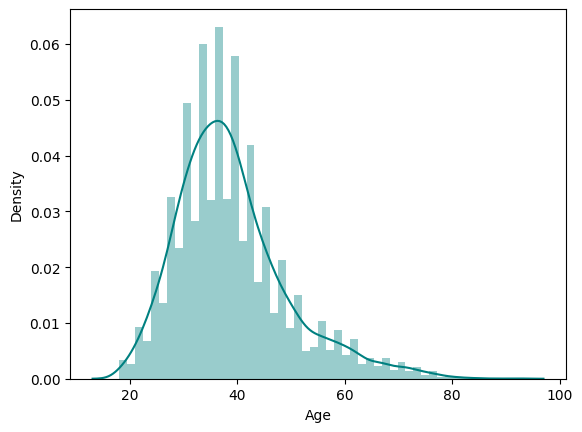

In [125]:
sns.distplot(df["Age"], color = '#008080')

<Axes: xlabel='CreditScore', ylabel='Density'>

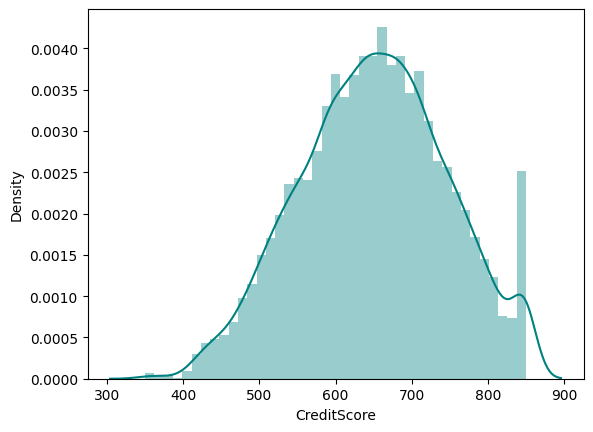

In [126]:
sns.distplot(df["CreditScore"], color = '#008080')

<Axes: xlabel='Tenure', ylabel='Density'>

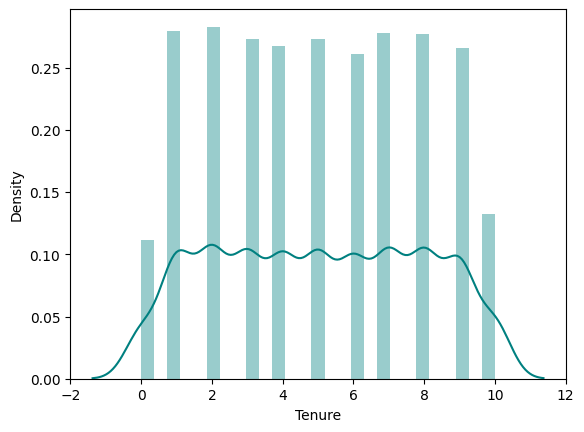

In [127]:
sns.distplot(df['Tenure'], color = '#008080')

<Axes: xlabel='Balance', ylabel='Density'>

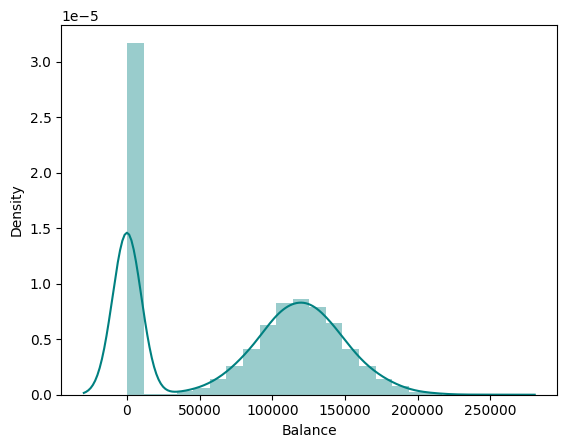

In [128]:
sns.distplot(df['Balance'], color = '#008080')

<Axes: xlabel='EstimatedSalary', ylabel='Density'>

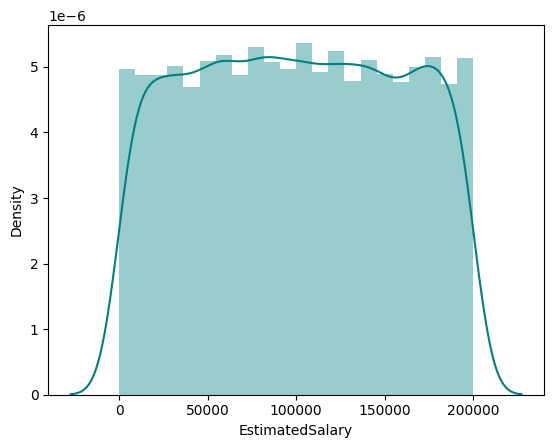

In [129]:
sns.distplot(df['EstimatedSalary'], color = '#008080')

Text(0.5, 1.0, 'Age Distribution of Churned and Non-Churned Customers')

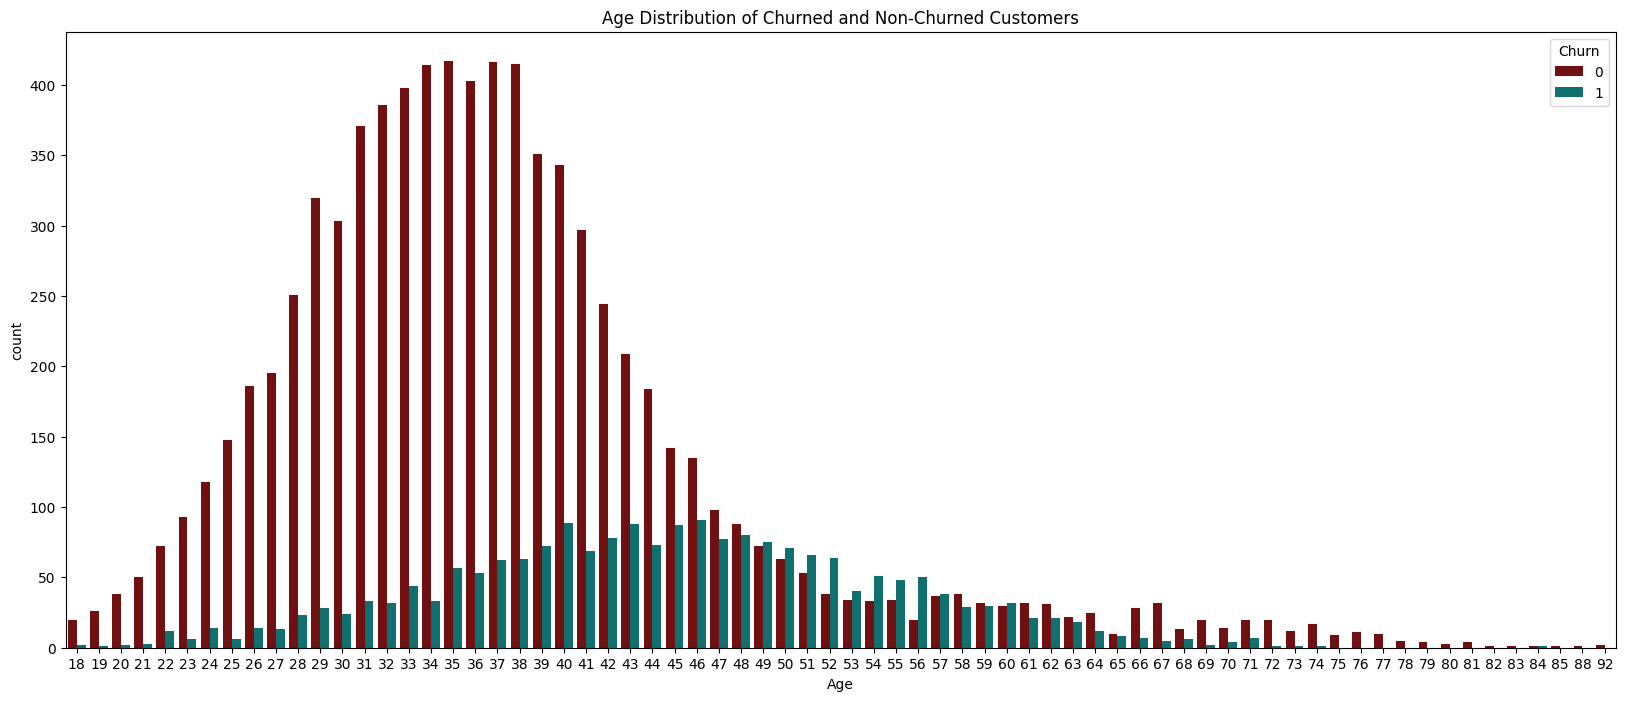

In [18]:
colors = [ '#800000', '#008080']
plt.figure(figsize=(20,8))
sns.countplot( x=df['Age'], hue=df['Churn'], palette=colors)
plt.title("Age Distribution of Churned and Non-Churned Customers")

<Axes: xlabel='Churn', ylabel='Age'>

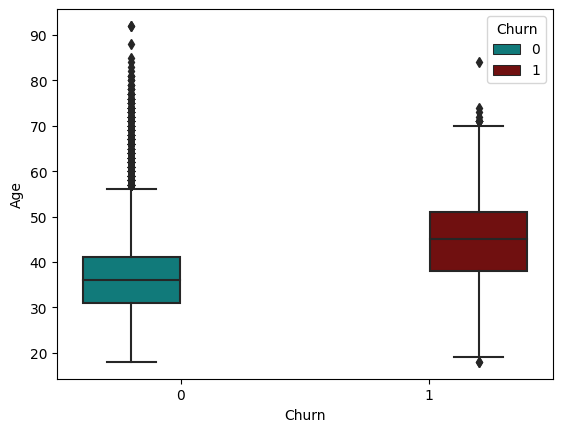

In [19]:
colors = [ 'darkcyan','maroon']
sns.boxplot(x=df['Churn'], y=df['Age'], hue=df['Churn'], palette=colors)

Churned Customers:
The average age of those who have churned from the bank is between 40-50 and extends upto 70.<br>

Non-Churned Customers:
Loyal customers to the bank are concentrated within the age group of 30-40 and there are also lot of customers who are above the age of 60 and are still using the bank's services meaning that senior citizens generally do not churn
<br>
<br>

In [20]:
avg_age_churn = df.groupby("Churn")['Age'].mean()

In [21]:
avg_age_churn

Churn
0    37.408589
1    44.836605
Name: Age, dtype: float64

--- Credit Score ---

Binning to distribute the credit score

In [22]:
def assign_bins(credit_score):
    if credit_score < 500:
        return '0-499'
    elif 500 <= credit_score < 600:
        return '500-599'
    elif 600 <= credit_score < 700:
        return '600-699'
    elif 700 <= credit_score < 800:
        return '700-799'
    elif 800 <= credit_score < 900:
        return '800-899'
    else:
        return '900-1000'

df['CreditScoreBins'] = df['CreditScore'].apply(assign_bins)

Text(0.5, 1.0, 'Credit Score of Churned and Non-Churned Customers')

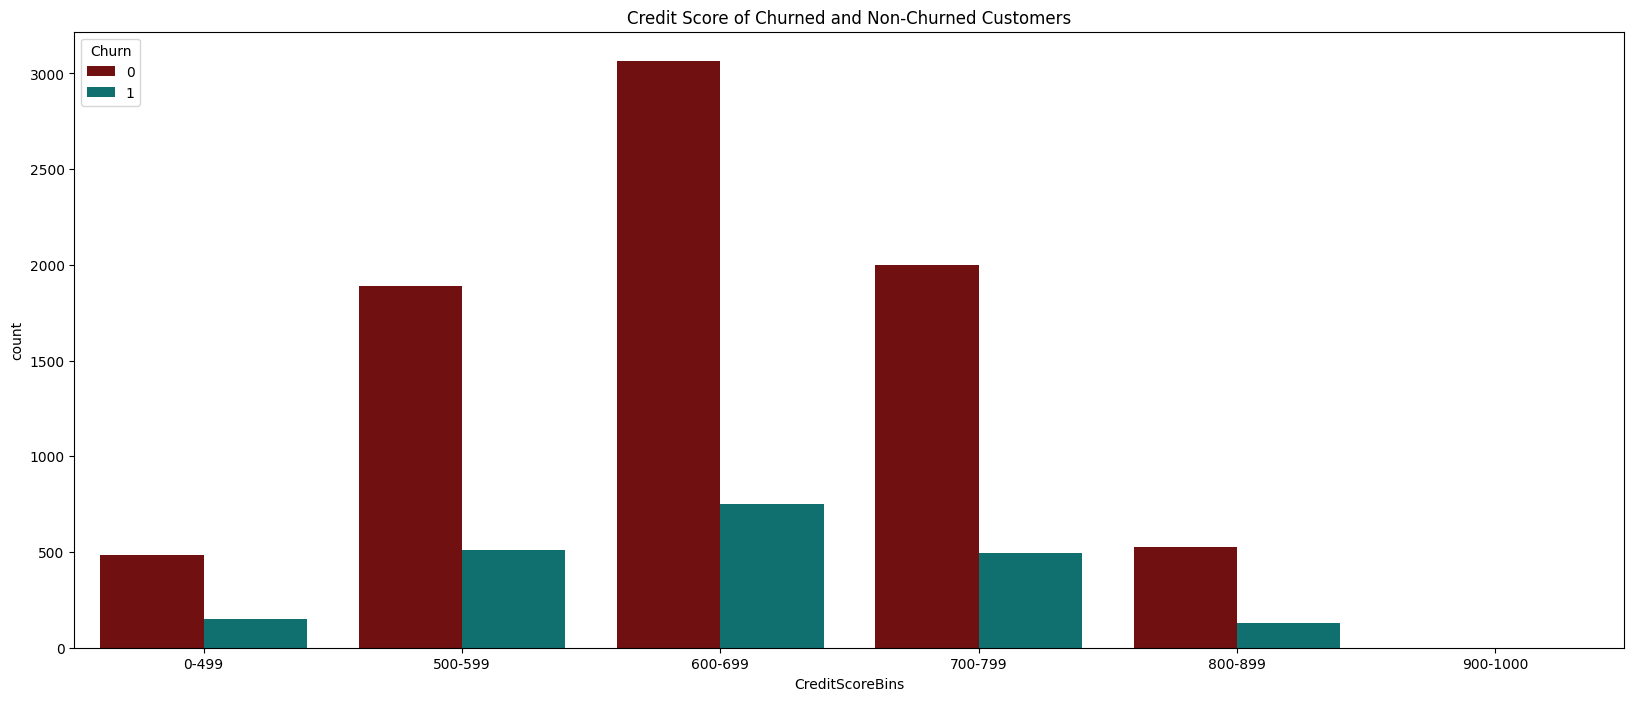

In [23]:
colors = [ '#800000', '#008080']
bin_labels = ['0-499', '500-599', '600-699', '700-799', '800-899', '900-1000']
plt.figure(figsize=(20,8))
sns.countplot( x=df['CreditScoreBins'], hue=df['Churn'], palette=colors, order = bin_labels)
plt.title("Credit Score of Churned and Non-Churned Customers")

<Axes: xlabel='Churn', ylabel='CreditScore'>

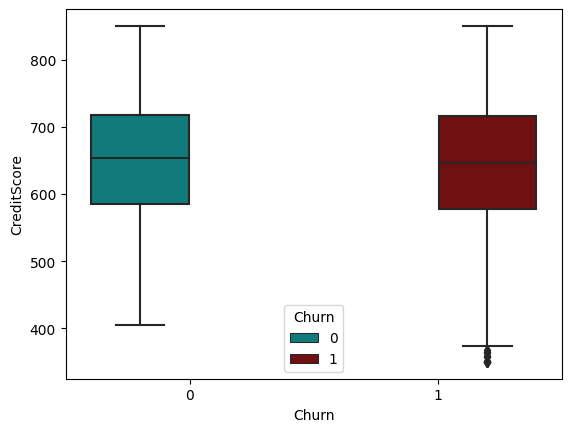

In [24]:
colors = [ 'darkcyan','maroon']
sns.boxplot(x=df['Churn'], y=df['CreditScore'], hue=df['Churn'], palette=colors)

In [25]:
avg_creditscore_churn = df.groupby("Churn")['CreditScore'].mean()

In [26]:
avg_creditscore_churn

Churn
0    651.870794
1    645.413641
Name: CreditScore, dtype: float64

--- Estimated Salary ---

In [27]:
def salary_bins(salary):
    if salary < 20000:
        return '0-20K'
    elif 20000 <= salary < 40000:
        return '20K-40K'
    elif 40000 <= salary < 60000:
        return '40K-60K'
    elif 60000 <= salary < 80000:
        return '60K-80K'
    elif 80000 <= salary < 100000:
        return '80K-100K'
    elif 100000 <= salary < 120000:
        return '100K-120K'
    else:
        return '>120K'

In [28]:
df['SalaryBins'] = df['EstimatedSalary'].apply(salary_bins)

Text(0.5, 1.0, 'Salary Distribution of Churned and Non-Churned Customers')

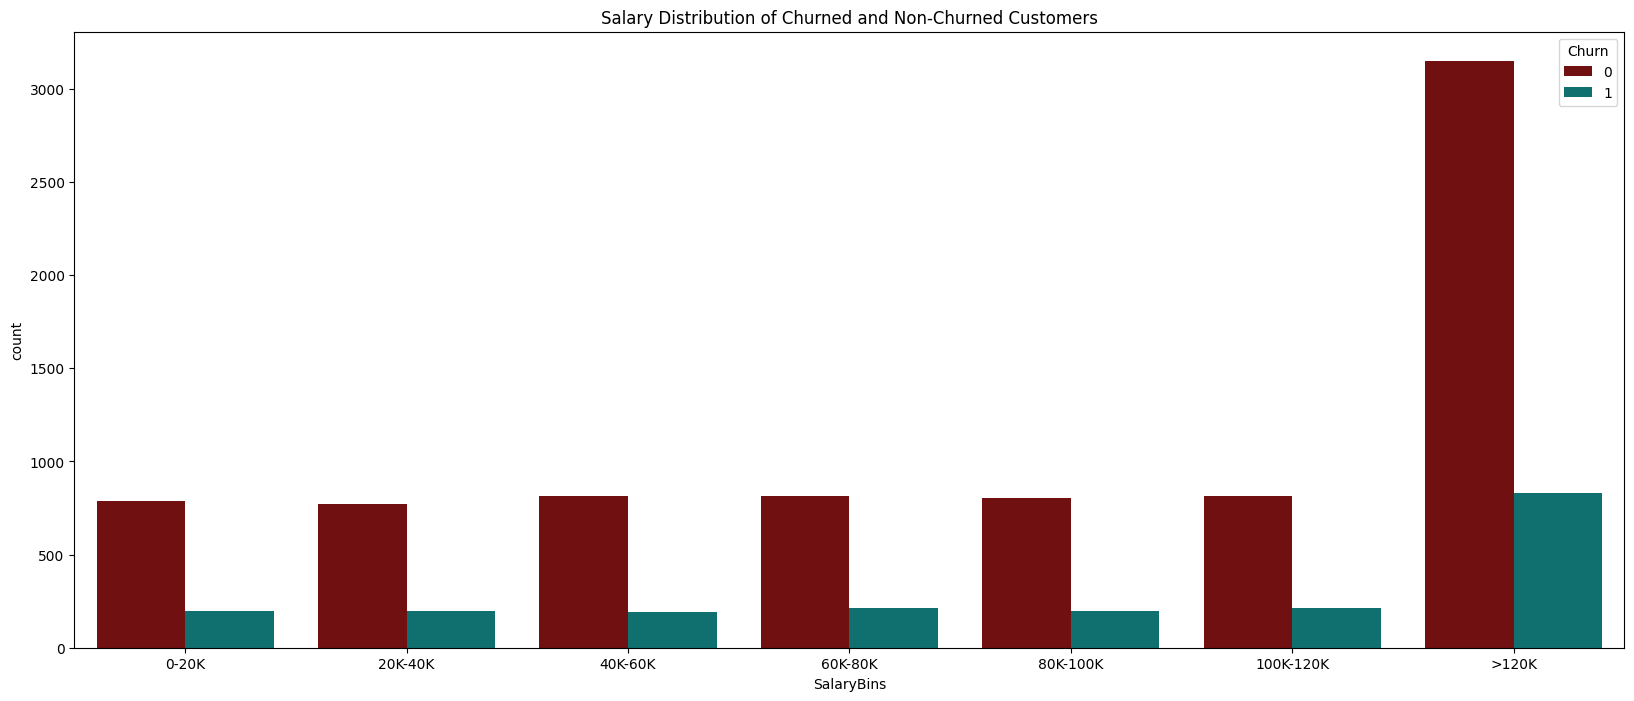

In [29]:
colors = [ '#800000', '#008080']
bin_labels = ['0-20K', '20K-40K', '40K-60K', '60K-80K', '80K-100K', '100K-120K', '>120K']
plt.figure(figsize=(20,8))
sns.countplot( x=df['SalaryBins'], hue=df['Churn'], palette=colors, order=bin_labels)
plt.title("Salary Distribution of Churned and Non-Churned Customers")

In [30]:
salaryPercent= df.groupby(['SalaryBins', 'Churn']).size().unstack().fillna(0)
print(salaryPercent)

Churn          0    1
SalaryBins           
0-20K        788  198
100K-120K    816  211
20K-40K      774  196
40K-60K      815  191
60K-80K      815  212
80K-100K     806  197
>120K       3150  833


In [31]:
salaryPercent['Non Churned Percentage'] = (salaryPercent[0] / (sum((salaryPercent[0]) + salaryPercent[1]))) * 100

In [32]:
salaryPercent['Non Churned Percentage'] = (salaryPercent[0] / (sum(salaryPercent[0]))) * 100

In [33]:
salaryPercent['Non Churned Percentage']

SalaryBins
0-20K         9.894525
100K-120K    10.246107
20K-40K       9.718734
40K-60K      10.233551
60K-80K      10.233551
80K-100K     10.120542
>120K        39.552988
Name: Non Churned Percentage, dtype: float64

In [34]:
salaryPercent['Churned Percentage'] = (salaryPercent[1] / (sum( salaryPercent[1]))) * 100

In [35]:
salaryPercent['Churned Percentage']

SalaryBins
0-20K         9.715407
100K-120K    10.353288
20K-40K       9.617272
40K-60K       9.371933
60K-80K      10.402355
80K-100K      9.666340
>120K        40.873405
Name: Churned Percentage, dtype: float64

Estimated salary of non-churned customers is relatively higher than those who have churned.<br>
40% of the non-churned and churned customers have a salary more than $120K. <br>

<Axes: xlabel='Churn', ylabel='EstimatedSalary'>

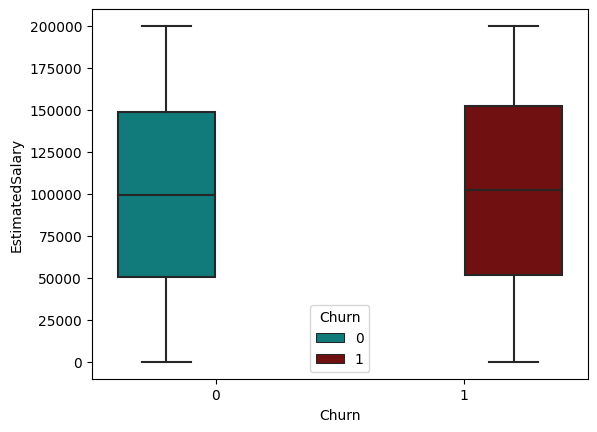

In [36]:
colors = [ 'darkcyan','maroon']
sns.boxplot(x=df['Churn'], y=df['EstimatedSalary'], hue=df['Churn'], palette=colors)

--- Tenure ---

Text(0.5, 1.0, 'Tenure Distribution of Churned and Non-Churned Customers')

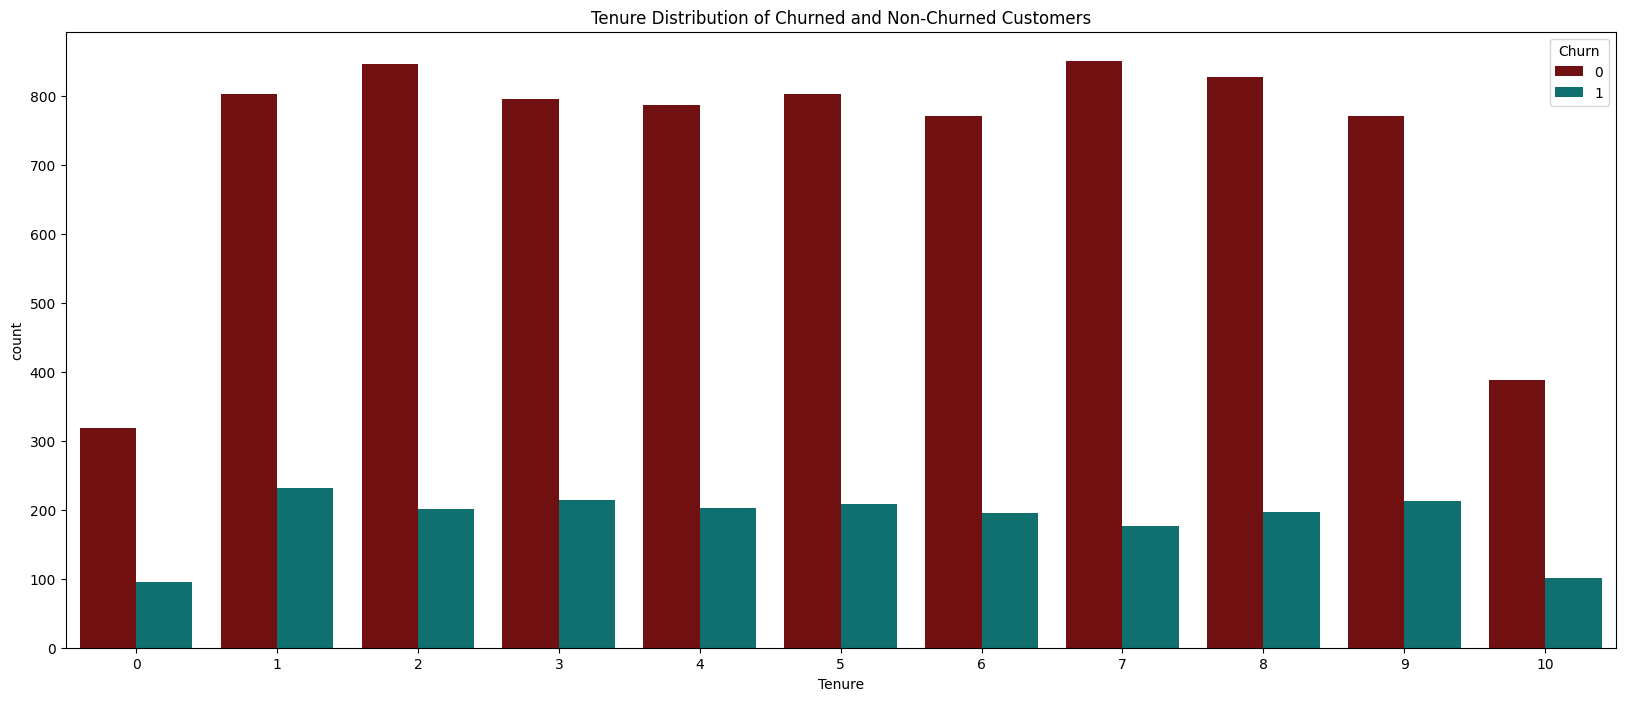

In [37]:
colors = [ '#800000', '#008080']
plt.figure(figsize=(20,8))
sns.countplot( x=df['Tenure'], hue=df['Churn'], palette=colors)
plt.title("Tenure Distribution of Churned and Non-Churned Customers")

<Axes: xlabel='Churn', ylabel='Tenure'>

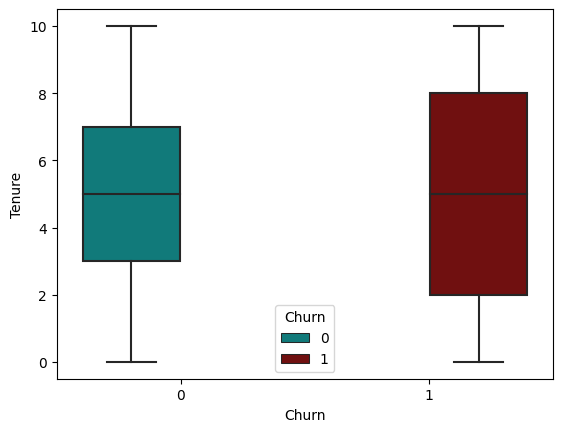

In [38]:
colors = [ 'darkcyan','maroon']
sns.boxplot(x=df['Churn'], y=df['Tenure'], hue=df['Churn'], palette=colors)

Churned customers have used the bank's products and services for a longer period of time (around 6 years) while those who have stayed with the bank have a relatively smaller tenure of 4 years.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


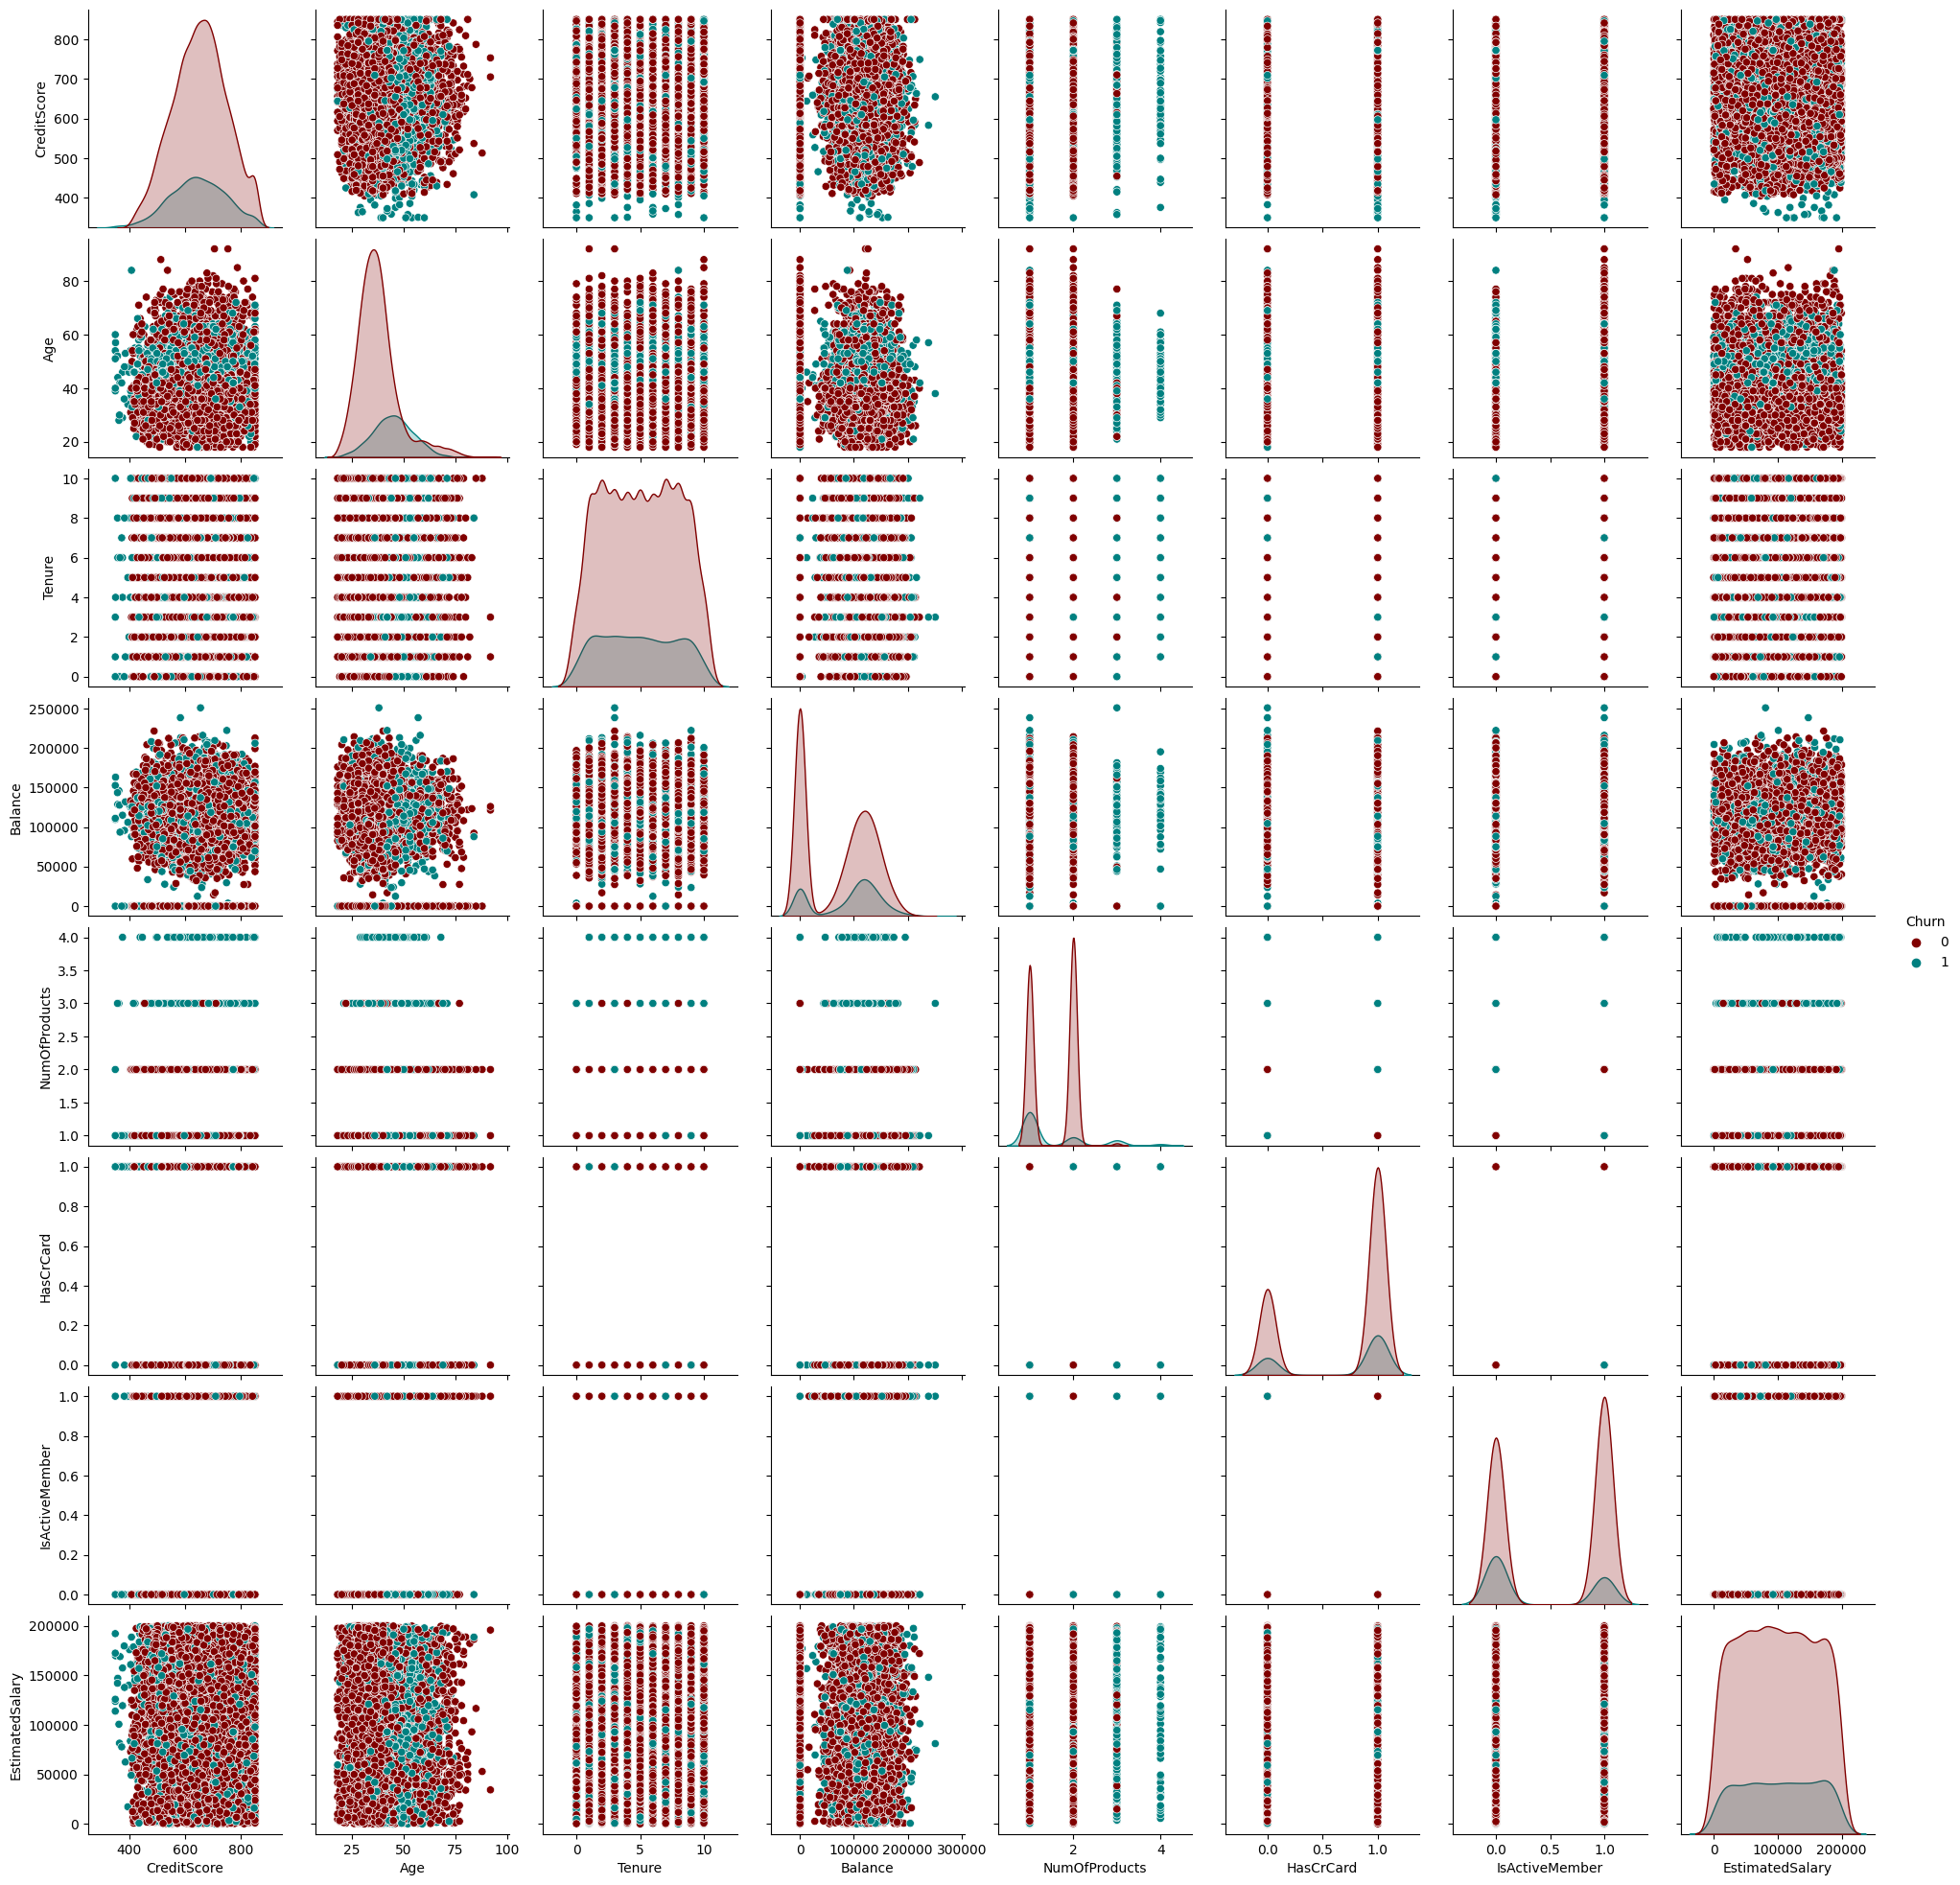

In [88]:
sns.pairplot(df,hue='Churn', palette = colors)

In [98]:
df.groupby('Gender')[['Age', 'EstimatedSalary', 'CreditScore','Balance']].mean()

,Age,EstimatedSalary,CreditScore,Balance
Gender,,,,
Female,39.235915,100587.80662,650.862456,75671.359329
Male,38.660865,99663.33544,650.299194,77173.589995


In [99]:
df.groupby('Tenure')[['Age', 'EstimatedSalary', 'CreditScore','Balance']].mean()

,Age,EstimatedSalary,CreditScore,Balance
Tenure,,,,
0,39.186441,102374.579128,652.043584,79878.910630
1,39.428986,100468.618957,648.806763,78555.384222
2,39.068702,98312.359857,652.832061,76839.626469
3,39.031683,97662.464921,650.650495,77665.492802
4,38.229293,99805.477828,651.644444,74116.043960
5,39.287549,101286.009644,650.527668,76444.280860
6,38.862461,99168.733154,647.380558,74403.942637
7,38.367704,101257.240370,649.606031,75551.634426
8,38.450732,101072.102937,647.749268,77936.598254


In [100]:
df.groupby('Churn')[['Age', 'EstimatedSalary', 'CreditScore','Balance']].mean()

,Age,EstimatedSalary,CreditScore,Balance
Churn,,,,
0,37.408589,99730.663543,651.870794,72752.503898
1,44.836605,101461.468916,645.413641,91100.672198


In [101]:
df.groupby('IsActiveMember')[['Age', 'EstimatedSalary', 'CreditScore','Balance']].mean()

,Age,EstimatedSalary,CreditScore,Balance
IsActiveMember,,,,
0.0,37.996702,100752.680023,648.028860,77144.879718
1.0,39.793632,99452.965894,652.934188,75875.422145


In [102]:
df.groupby('HasCrCard')[['Age', 'EstimatedSalary', 'CreditScore','Balance']].mean()

,Age,EstimatedSalary,CreditScore,Balance
HasCrCard,,,,
0.0,39.112054,100974.397711,651.345331,77920.787552
1.0,38.842851,99711.474685,650.225308,75894.486558


In [103]:
df.groupby('NumOfProducts')[['Age', 'EstimatedSalary', 'CreditScore','Balance']].mean()

,Age,EstimatedSalary,CreditScore,Balance
NumOfProducts,,,,
1,39.672960,99475.202480,649.149066,98558.083184
2,37.754520,100450.365360,652.214768,51884.198342
3,43.195489,104318.130564,648.105263,75458.328195
4,45.683333,104763.723333,653.583333,93733.135000


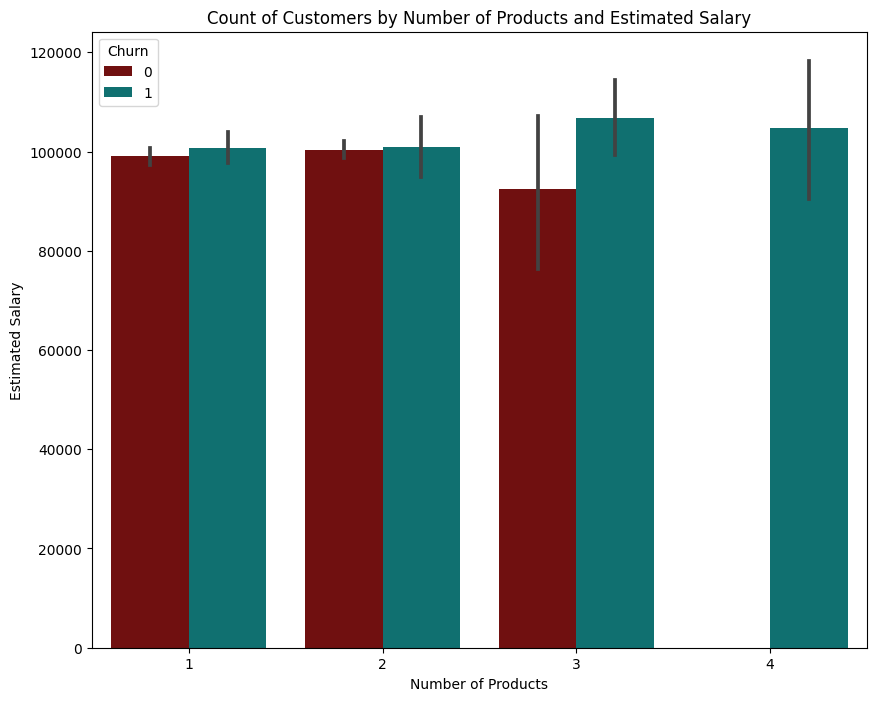

In [109]:
colors = [ '#800000', '#008080']
plt.figure(figsize=(10, 8))
sns.barplot(x='NumOfProducts', y='EstimatedSalary', hue='Churn', data=df, palette=colors)
plt.title('Count of Customers by Number of Products and Estimated Salary')
plt.xlabel('Number of Products')
plt.ylabel('Estimated Salary')
plt.show()

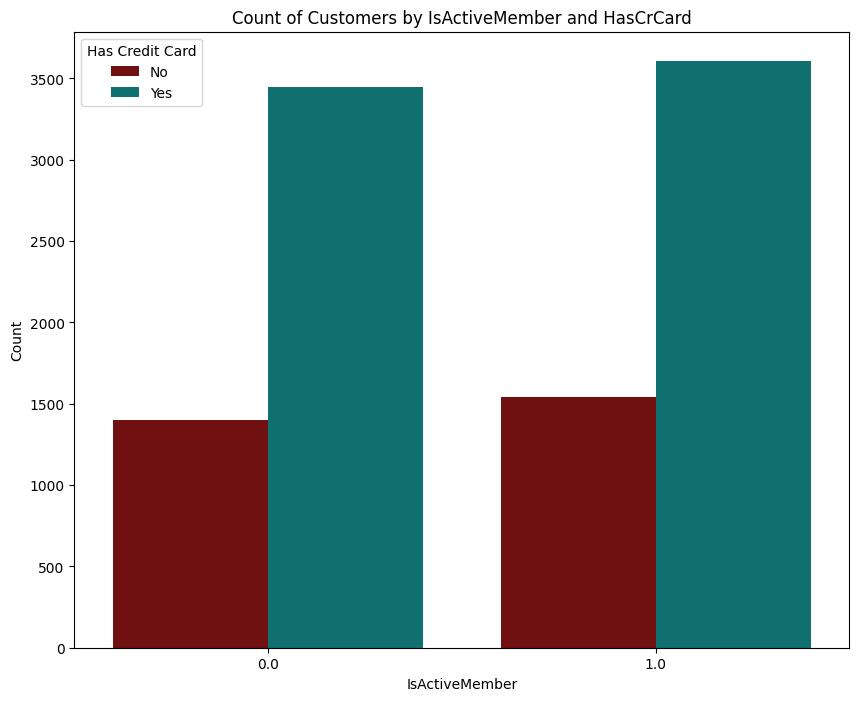

In [39]:
colors = [ '#800000', '#008080']
plt.figure(figsize=(10,8))
sns.countplot(x='IsActiveMember', hue='HasCrCard', data=df, palette= colors)
plt.title('Count of Customers by IsActiveMember and HasCrCard')
plt.xlabel('IsActiveMember')
plt.ylabel('Count')
plt.legend(title='Has Credit Card', labels=['No', 'Yes'])
plt.show()

In [40]:
credit_churned = df.groupby('Churn')['HasCrCard'].value_counts().unstack()

In [41]:
print(credit_churned)

HasCrCard   0.0   1.0
Churn                
0          2332  5632
1           613  1425


In [42]:
churned_with_credit = df[(df['Churn'] == 1) & (df['HasCrCard'] == 1)].shape[0]
total_with_credit = df[df['HasCrCard'] == 1].shape[0]
churned_percent_with_credit = (churned_with_credit / total_with_credit) * 100
print(churned_percent_with_credit)

20.192716451750034


In [43]:
nonchurned_with_credit = df[(df['Churn'] == 0) & (df['HasCrCard'] == 1)].shape[0]
total_credit = df[df['HasCrCard'] == 1].shape[0]
nonchurned_percent_with_credit = (nonchurned_with_credit / total_credit) * 100
print(nonchurned_percent_with_credit)

79.80728354824997


In [44]:
churned_without_credit = df[(df['Churn'] == 1) & (df['HasCrCard'] == 0)].shape[0]
total_noncredit = df[df['HasCrCard'] == 0].shape[0]
churned_percent_without_credit = (churned_without_credit / total_noncredit) * 100
print(churned_percent_without_credit)

20.814940577249573


In [45]:
nonchurned_without_credit = df[(df['Churn'] == 0) & (df['HasCrCard'] == 0)].shape[0]
total_noncredit = df[df['HasCrCard'] == 0].shape[0]
nonchurned_percent_without_credit = (nonchurned_without_credit / total_noncredit) * 100
print(nonchurned_percent_without_credit)

79.18505942275043


There is no significant difference in customer churning depending on whether they have credit card or not.

<Axes: xlabel='Balance', ylabel='CreditScore'>

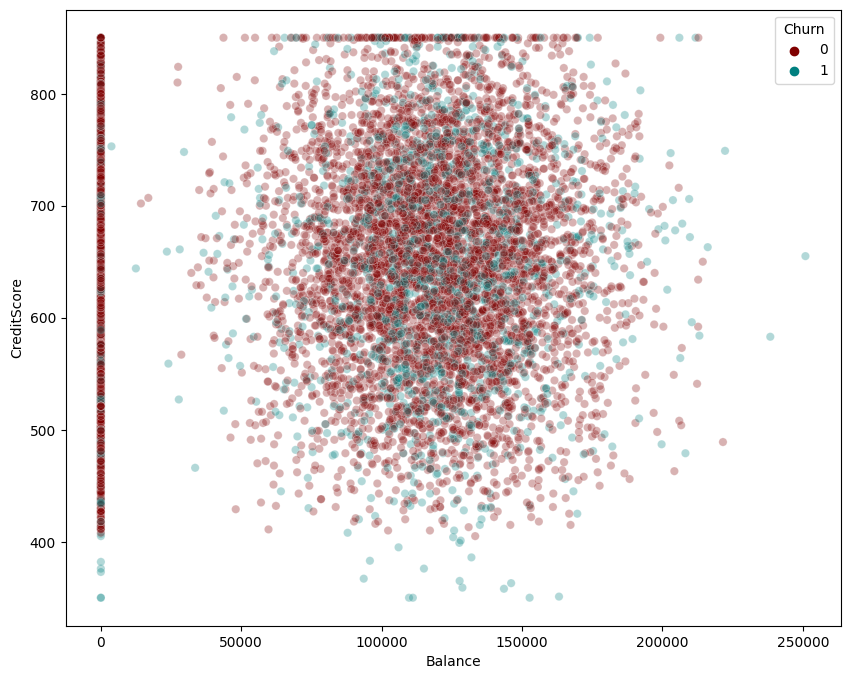

In [46]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Balance', y = 'CreditScore', hue = "Churn", data =df , palette = colors, alpha =0.3)

In [47]:
products_tenure = df.groupby(['NumOfProducts'])['Tenure'].mean()

In [48]:
products_tenure

NumOfProducts
1    4.974435
2    5.051405
3    5.003759
4    5.300000
Name: Tenure, dtype: float64

In [49]:
df['Tenure'].mean()

5.0124975004999

In [50]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn,CreditScoreBins,SalaryBins
0,619,France,Female,42,2,0.00,1,1.0,1.0,101348.88,1,600-699,100K-120K
1,608,Spain,Female,41,1,83807.86,1,0.0,1.0,112542.58,0,600-699,100K-120K
2,502,France,Female,42,8,159660.80,3,1.0,0.0,113931.57,1,500-599,100K-120K
3,699,France,Female,39,1,0.00,2,0.0,0.0,93826.63,0,600-699,80K-100K
4,850,Spain,Female,43,2,125510.82,1,1.0,1.0,79084.10,0,800-899,60K-80K


##### Defining the predictor and target variables

In [51]:
X = df.loc[:, ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'CreditScoreBins', 'SalaryBins']]

In [52]:
y = df.loc[:, ['Churn']]

#### Feature Engineering

##### Feature Labeling

In [53]:
X['Geography'].replace({'France':1, "Spain":2, "Germany":3}, inplace = True)

In [54]:
X['CreditScoreBins'].replace({'0-499':1, '500-599':2, '600-699':3, '700-799':4, '800-899':5, '900-1000':6}, inplace = True)

In [55]:
X['SalaryBins'].replace({'0-20K':1, '20K-40K':2, '40K-60K':3, '60K-80K':4, '80K-100K':5, '100K-120K':6, '>120K':7}, inplace = True)

In [56]:
X['Gender'].replace({"Female":0, "Male":1}, inplace= True)

In [57]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CreditScoreBins,SalaryBins
0,619,1,0,42,2,0.00,1,1.0,1.0,101348.88,3,6
1,608,2,0,41,1,83807.86,1,0.0,1.0,112542.58,3,6
2,502,1,0,42,8,159660.80,3,1.0,0.0,113931.57,2,6
3,699,1,0,39,1,0.00,2,0.0,0.0,93826.63,3,5
4,850,2,0,43,2,125510.82,1,1.0,1.0,79084.10,5,4


##### Data Split

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

##### Feature Scaling

In [59]:
from sklearn.preprocessing import StandardScaler
scalerAge = StandardScaler()
scalerBalance = StandardScaler()
scalerSalary = StandardScaler()

In [60]:
X['Age'] = scalerAge.fit_transform(X[['Age']])

In [61]:
X['Balance'] = scalerBalance.fit_transform(X[['Balance']])

In [62]:
X['EstimatedSalary'] = scalerSalary.fit_transform(X[['EstimatedSalary']])

In [63]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,CreditScoreBins,SalaryBins
0,619,1,0,0.293518,2,-1.226009,1,1.0,1.0,0.022008,3,6
1,608,2,0,0.198155,1,0.117274,1,0.0,1.0,0.216663,3,6
2,502,1,0,0.293518,8,1.333054,3,1.0,0.0,0.240817,2,6
3,699,1,0,0.007427,1,-1.226009,2,0.0,0.0,-0.108802,3,5
4,850,2,0,0.388882,2,0.785694,1,1.0,1.0,-0.365171,5,4


In [64]:
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'CreditScoreBins', 'SalaryBins'],
      dtype='object')

##### Feature Importance

In [65]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
mutual_info

array([0.00523211, 0.01553897, 0.00455151, 0.06500746, 0.        ,
       0.00515252, 0.06488914, 0.00534296, 0.01263417, 0.00120463,
       0.        , 0.        ])

These scores indicate the mutual information between each feature and the target variable.<br>
Here are the mutual information scores for each feature:

- CreditScore: 0.0020473
- Geography: 0.0173695
- Gender: 0.00893261
- Age: 0.0696434
- Tenure: 0.00204114
- Balance: 0.00788394
- NumOfProducts: 0.07557507
- HasCrCard: 0.0
- IsActiveMember: 0.01082907
- EstimatedSalary: 0.0011838
- CreditScoreBins: 0.0
- SalaryBins: 0.0


In [68]:
X_train.drop(['CreditScoreBins', 'SalaryBins'], axis=1, inplace=True)
X_test.drop(['CreditScoreBins', 'SalaryBins'], axis=1, inplace=True)

In [69]:
from sklearn.feature_selection import SelectKBest
sel_cols = SelectKBest(mutual_info_classif, k = 10)
sel_cols.fit(X_train, y_train)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SelectKBest(score_func=<function mutual_info_classif at 0x281c26fc0>)

In [70]:
selected_features_indices = sel_cols.get_support(indices=True)
selected_features_names = X_train.columns[selected_features_indices]

In [71]:
print("Selected Features:", selected_features_names)

Selected Features: Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


In [72]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importances = rf.feature_importances_

importance_dict = {feature: importance for feature, importance in zip(X_train.columns, feature_importances)}
sorted_importance_dict = dict(sorted(importance_dict.items(), key=lambda item: item[1], reverse=True))

for feature, importance in sorted_importance_dict.items():
    print(f"{feature}: {importance:.2f}")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Age: 0.24
EstimatedSalary: 0.15
Balance: 0.14
CreditScore: 0.14
NumOfProducts: 0.13
Tenure: 0.08
IsActiveMember: 0.04
Geography: 0.04
HasCrCard: 0.02
Gender: 0.02


From mutal_info and the aobove feature importance, the top 3 features that play a crucial role in determining the target variable:
1. Age
2. Number of Products
3. IsActiveMember

##### Model Building

In [81]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [82]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_dtc_test = dtc.predict(X_test)
y_pred_dtc_train = dtc.predict(X_train)

test_acc_dtc = accuracy_score(y_test, y_pred_dtc_test)
train_acc_dtc = accuracy_score(y_train, y_pred_dtc_train)

print(f'Test Accuracy: {test_acc_dtc:.2f}')
print(f'Train Accuracy: {train_acc_dtc:.2f}')


Test Accuracy: 0.78
Train Accuracy: 1.00


In [73]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [76]:

y_pred_rf_test = rf.predict(X_test)
y_pred_rf_train = rf.predict(X_train)

test_acc_rf = accuracy_score(y_test, y_pred_rf_test)
train_acc_rf = accuracy_score(y_train, y_pred_rf_train)

print(f'Test Accuracy: {test_acc_rf:.2f}')
print(f'Train Accuracy: {train_acc_rf:.2f}')

Test Accuracy: 0.86
Train Accuracy: 1.00


In [79]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [80]:
y_pred_xgb_test = xgb.predict(X_test)
y_pred_xgb_train = xgb.predict(X_train)

test_acc_xgb = accuracy_score(y_test, y_pred_xgb_test)
train_acc_xgb = accuracy_score(y_train, y_pred_xgb_train)

print(f'Test Accuracy: {test_acc_xgb:.2f}')
print(f'Train Accuracy: {train_acc_xgb:.2f}')

Test Accuracy: 0.86
Train Accuracy: 0.96


##### Hyperparameter Tuning Using GridSearchCV

In [85]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.7, 0.8],
    'colsample_bytree': [0.6, 0.7, 0.8],
    'gamma': [0, 0.1, 0.2]
}

In [86]:
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)
best_xgb = grid_search.best_estimator_

y_pred_best_xgb_test = best_xgb.predict(X_test)
y_pred_best_xgb_train = best_xgb.predict(X_train)

test_acc_best_xgb = accuracy_score(y_test, y_pred_best_xgb_test)
train_acc_best_xgb = accuracy_score(y_train, y_pred_best_xgb_train)

print(f'Test Accuracy: {test_acc_best_xgb:.2f}')
print(f'Train Accuracy: {train_acc_best_xgb:.2f}')

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.6; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.6; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, m